Dataset Preprocessing & Feature Extraction

In [18]:
%pip install torchaudio librosa transformers datasets torch torchvision torchaudio


Note: you may need to restart the kernel to use updated packages.


Preprocessing Dataset

In [25]:
import os
import torch
import librosa
import numpy as np
import torchaudio.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tv_transforms

# Define constants
SAMPLE_RATE = 16000  # Ensure consistency
N_MELS = 128
FIXED_LENGTH = 256  # Fixed spectrogram length

class AudioDataset(Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path = self.data[idx]
        label = self.labels[idx]

        try:
            # Load audio
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

            if len(y) == 0:
                print(f"Skipping empty file: {file_path}")
                return None

            # Convert to Mel spectrogram
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

            # Resize spectrogram to fixed shape
            if mel_spectrogram.shape[1] < FIXED_LENGTH:
                pad_width = FIXED_LENGTH - mel_spectrogram.shape[1]
                mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')
            elif mel_spectrogram.shape[1] > FIXED_LENGTH:
                mel_spectrogram = mel_spectrogram[:, :FIXED_LENGTH]

            # Convert to PyTorch tensor
            mel_spectrogram = torch.tensor(mel_spectrogram, dtype=torch.float32)
            mel_spectrogram = mel_spectrogram.unsqueeze(0)  # Add channel dimension

            return mel_spectrogram, torch.tensor(label, dtype=torch.long)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            return None

# Custom collate function to skip None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load dataset
train_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/training")
val_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/validation")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)


Simple CNN

Epoch 1/10:  12%|█▏        | 201/1684 [01:37<11:58,  2.06it/s, loss=0.2]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 1/10:  70%|██████▉   | 1171/1684 [09:30<04:07,  2.07it/s, loss=0.0327] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 1/10: 100%|██████████| 1684/1684 [13:36<00:00,  2.06it/s, loss=0.0546]  
/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1690
  warnings.warn(


Epoch 1/10 - Train Loss: 0.1727, Train Acc: 94.14%, Val Loss: 0.0588, Val Acc: 97.81%


Epoch 2/10:  44%|████▍     | 739/1684 [06:00<08:06,  1.94it/s, loss=0.0895]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 2/10:  62%|██████▏   | 1052/1684 [08:33<05:05,  2.07it/s, loss=0.00808] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 2/10: 100%|██████████| 1684/1684 [13:38<00:00,  2.06it/s, loss=0.000509]


Epoch 2/10 - Train Loss: 0.0398, Train Acc: 98.59%, Val Loss: 0.0185, Val Acc: 99.39%


Epoch 3/10:  18%|█▊        | 300/1684 [02:25<11:04,  2.08it/s, loss=0.000212]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 3/10:  27%|██▋       | 456/1684 [03:41<09:46,  2.09it/s, loss=0.0623]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 3/10: 100%|██████████| 1684/1684 [13:50<00:00,  2.03it/s, loss=0.0439]  


Epoch 3/10 - Train Loss: 0.0257, Train Acc: 99.14%, Val Loss: 0.0266, Val Acc: 99.03%


Epoch 4/10:  53%|█████▎    | 900/1684 [07:13<06:13,  2.10it/s, loss=0.00248] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 4/10:  81%|████████  | 1362/1684 [10:56<02:36,  2.06it/s, loss=0.00749] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 4/10: 100%|██████████| 1684/1684 [13:31<00:00,  2.08it/s, loss=0.0098]  


Epoch 4/10 - Train Loss: 0.0214, Train Acc: 99.29%, Val Loss: 0.0238, Val Acc: 99.19%


Epoch 5/10:  62%|██████▏   | 1045/1684 [08:20<05:13,  2.04it/s, loss=0.202]   

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 5/10:  90%|█████████ | 1518/1684 [12:08<01:19,  2.09it/s, loss=0.00966] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 5/10: 100%|██████████| 1684/1684 [13:28<00:00,  2.08it/s, loss=0.022]   


Epoch 5/10 - Train Loss: 0.0188, Train Acc: 99.35%, Val Loss: 0.0219, Val Acc: 99.38%


Epoch 6/10:  24%|██▍       | 400/1684 [03:12<10:16,  2.08it/s, loss=0.000636]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 6/10:  84%|████████▍ | 1412/1684 [11:18<02:14,  2.02it/s, loss=0.000301]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 6/10: 100%|██████████| 1684/1684 [13:28<00:00,  2.08it/s, loss=6.57e-6] 


Epoch 6/10 - Train Loss: 0.0108, Train Acc: 99.64%, Val Loss: 0.0101, Val Acc: 99.64%


Epoch 7/10:  64%|██████▎   | 1073/1684 [08:31<04:53,  2.08it/s, loss=0.0035]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 7/10:  80%|███████▉  | 1346/1684 [10:41<02:40,  2.11it/s, loss=0.357]   

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 7/10: 100%|██████████| 1684/1684 [13:21<00:00,  2.10it/s, loss=0.000867]


Epoch 7/10 - Train Loss: 0.0166, Train Acc: 99.53%, Val Loss: 0.0265, Val Acc: 99.09%


Epoch 8/10:  38%|███▊      | 635/1684 [05:01<08:22,  2.09it/s, loss=0.0311]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 8/10:  64%|██████▎   | 1071/1684 [08:26<04:50,  2.11it/s, loss=1.6e-5]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 8/10: 100%|██████████| 1684/1684 [13:15<00:00,  2.12it/s, loss=0.00019] 


Epoch 8/10 - Train Loss: 0.0143, Train Acc: 99.58%, Val Loss: 0.0340, Val Acc: 99.08%


Epoch 9/10:  66%|██████▌   | 1110/1684 [08:41<04:28,  2.14it/s, loss=0.000187]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 9/10:  71%|███████   | 1190/1684 [09:19<03:50,  2.14it/s, loss=1.97e-5] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 9/10: 100%|██████████| 1684/1684 [13:11<00:00,  2.13it/s, loss=0]       


Epoch 9/10 - Train Loss: 0.0103, Train Acc: 99.72%, Val Loss: 0.0112, Val Acc: 99.61%


Epoch 10/10:  17%|█▋        | 293/1684 [02:20<11:09,  2.08it/s, loss=1.7e-5]  

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 10/10:  31%|███       | 525/1684 [04:12<09:13,  2.09it/s, loss=0.00316] 

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 10/10: 100%|██████████| 1684/1684 [13:28<00:00,  2.08it/s, loss=5.53e-5] 


Epoch 10/10 - Train Loss: 0.0132, Train Acc: 99.62%, Val Loss: 0.0076, Val Acc: 99.77%


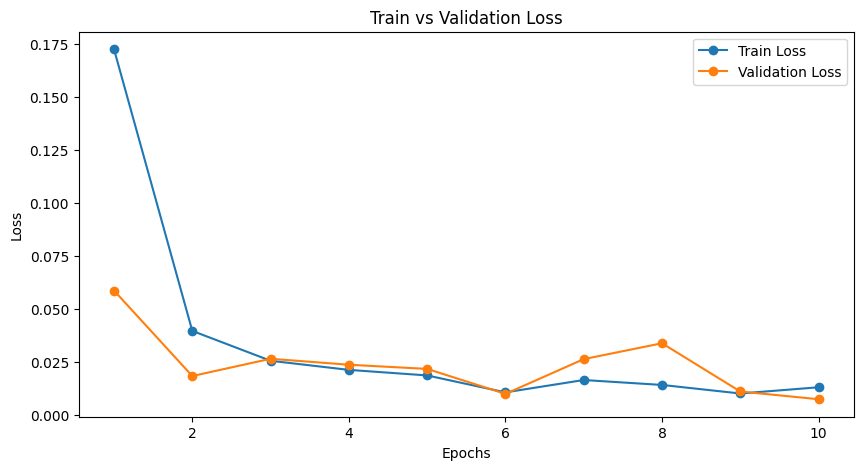

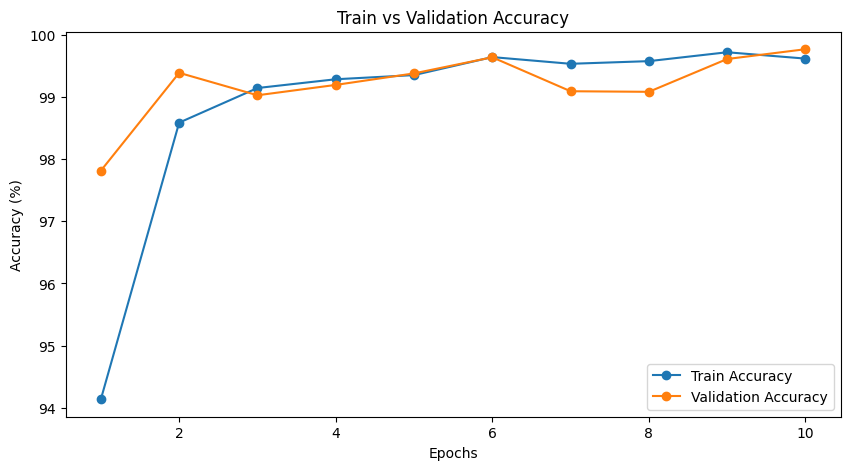

Model saved as audio_cnn.pth


In [35]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm  # Progress bar

# Define a simple CNN model
class AudioCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * (N_MELS // 8) * (FIXED_LENGTH // 8), 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AudioCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        # Progress bar
        loop = tqdm(train_loader, leave=True)
        loop.set_description(f"Epoch {epoch+1}/{num_epochs}")

        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loop.set_postfix(loss=loss.item())

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100 * correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Plot Train vs Validation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker="o")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train vs Validation Loss")
    plt.legend()
    plt.show()

    # Plot Train vs Validation Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_accs, label="Train Accuracy", marker="o")
    plt.plot(range(1, num_epochs + 1), val_accs, label="Validation Accuracy", marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Validation Accuracy")
    plt.legend()
    plt.show()

# Train the model
train(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Save the trained model
torch.save(model.state_dict(), "audio_cnn.pth")
print("Model saved as audio_cnn.pth")


Testing 

Model loaded successfully!


Testing: 100%|██████████| 145/145 [00:35<00:00,  4.10it/s, loss=0.319]   

Test Loss: 13.5382
Accuracy: 0.5602
Precision: 0.5377
Recall: 0.9979
F1 Score: 0.6989


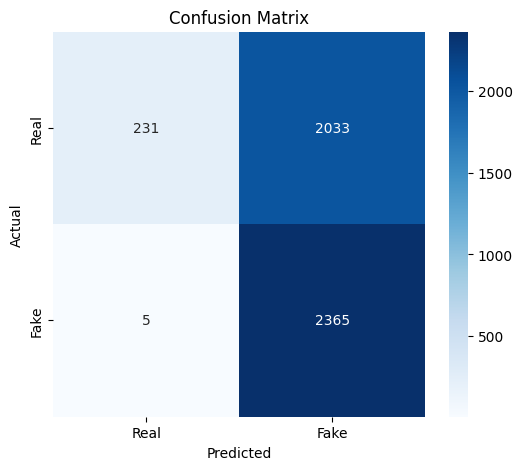

In [58]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from torch.utils.data import DataLoader
from tqdm import tqdm 
import librosa
import os

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the same model architecture
class AudioCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # 3 input channels
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * (128 // 8) * (256 // 8), 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Initialize model
model = AudioCNN().to(device)

# Load model weights, ignoring conv1 if necessary
state_dict = torch.load("audio_cnn.pth", map_location=device)
del state_dict["conv1.weight"]
del state_dict["conv1.bias"]
model.load_state_dict(state_dict, strict=False)

model.eval()  # Set to evaluation mode
print("Model loaded successfully!")

# Load test dataset
class AudioDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path, label = self.data[idx], self.labels[idx]
        y, sr = librosa.load(file_path, sr=16000)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

        # Ensure shape (128, 256)
        mel_spec = np.pad(mel_spec, ((0, 0), (0, max(0, 256 - mel_spec.shape[1]))), mode="constant")[:, :256]

        # Convert to tensor
        mel_spec = torch.tensor(mel_spec, dtype=torch.float32).unsqueeze(0)  # (1, 128, 256)
        mel_spec = torch.cat([mel_spec] * 3, dim=0)  # Convert to 3 channels for CNN

        return mel_spec, torch.tensor(label, dtype=torch.long)

# Load test data
test_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/testing")
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate on Test Data with Progress Bar
all_preds, all_labels = [], []
test_loss = 0.0
criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    loop = tqdm(test_loader, desc="Testing", leave=True)
    
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        preds = outputs.argmax(dim=1)  # Get predicted labels

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        test_loss += loss.item()
        loop.set_postfix(loss=loss.item())

# Compute Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="binary")
conf_mat = confusion_matrix(all_labels, all_preds)

# Print Metrics
print(f"Test Loss: {test_loss / len(test_loader):.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Using Dropout,Early Stopping and L2 Regularization

Epoch 1/20:   5%|▍         | 76/1684 [00:38<13:40,  1.96it/s]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1891
  warnings.warn(
Epoch 1/20:  56%|█████▌    | 935/1684 [07:48<06:03,  2.06it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 1/20:  79%|███████▉  | 1330/1684 [11:02<02:53,  2.04it/s]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1837
  warnings.warn(
Epoch 1/20:  94%|█████████▎| 1577/1684 [13:04<00:52,  2.04it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 1/20: 100%|██████████| 1684/1684 [13:57<00:00,  2.01it/s]
/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1690
  warnings.warn(


Epoch 1 - Train Loss: 0.2488, Train Acc: 91.11%, Val Loss: 0.0657, Val Acc: 97.81%


Epoch 2/20:  84%|████████▎ | 1410/1684 [11:39<02:15,  2.03it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 2/20:  89%|████████▊ | 1494/1684 [12:21<01:34,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 2/20: 100%|██████████| 1684/1684 [13:56<00:00,  2.01it/s]


Epoch 2 - Train Loss: 0.0505, Train Acc: 98.25%, Val Loss: 0.0161, Val Acc: 99.44%


Epoch 3/20:  35%|███▍      | 589/1684 [04:55<09:07,  2.00it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 3/20:  37%|███▋      | 619/1684 [05:10<09:08,  1.94it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 3/20: 100%|██████████| 1684/1684 [13:49<00:00,  2.03it/s]


Epoch 3 - Train Loss: 0.0283, Train Acc: 99.04%, Val Loss: 0.0192, Val Acc: 99.45%


Epoch 4/20:  55%|█████▌    | 932/1684 [07:39<06:14,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 4/20:  60%|█████▉    | 1003/1684 [08:15<05:40,  2.00it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 4/20: 100%|██████████| 1684/1684 [13:53<00:00,  2.02it/s]


Epoch 4 - Train Loss: 0.0232, Train Acc: 99.22%, Val Loss: 0.0145, Val Acc: 99.53%


Epoch 5/20:   2%|▏         | 26/1684 [00:12<13:53,  1.99it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 5/20:  21%|██        | 355/1684 [02:55<10:47,  2.05it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 5/20: 100%|██████████| 1684/1684 [13:56<00:00,  2.01it/s]


Epoch 5 - Train Loss: 0.0222, Train Acc: 99.30%, Val Loss: 0.0095, Val Acc: 99.68%


Epoch 6/20:  33%|███▎      | 558/1684 [04:35<09:26,  1.99it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 6/20:  94%|█████████▍| 1587/1684 [13:08<00:47,  2.04it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 6/20: 100%|██████████| 1684/1684 [13:56<00:00,  2.01it/s]


Epoch 6 - Train Loss: 0.0172, Train Acc: 99.47%, Val Loss: 0.0062, Val Acc: 99.74%


Epoch 7/20:  66%|██████▌   | 1114/1684 [09:13<04:34,  2.08it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 7/20:  78%|███████▊  | 1318/1684 [10:53<03:03,  2.00it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 7/20: 100%|██████████| 1684/1684 [13:54<00:00,  2.02it/s]


Epoch 7 - Train Loss: 0.0199, Train Acc: 99.43%, Val Loss: 0.0095, Val Acc: 99.68%


Epoch 8/20:  63%|██████▎   | 1066/1684 [08:49<05:00,  2.06it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 8/20:  83%|████████▎ | 1395/1684 [11:31<02:22,  2.03it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 8/20: 100%|██████████| 1684/1684 [13:53<00:00,  2.02it/s]


Epoch 8 - Train Loss: 0.0153, Train Acc: 99.52%, Val Loss: 0.0128, Val Acc: 99.48%


Epoch 9/20:  49%|████▉     | 826/1684 [06:52<07:02,  2.03it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 9/20:  95%|█████████▍| 1596/1684 [13:18<00:43,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 9/20: 100%|██████████| 1684/1684 [14:01<00:00,  2.00it/s]


Epoch 9 - Train Loss: 0.0192, Train Acc: 99.44%, Val Loss: 0.0076, Val Acc: 99.73%


Epoch 10/20:  30%|██▉       | 498/1684 [04:08<10:00,  1.97it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 10/20:  49%|████▉     | 833/1684 [06:56<07:02,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 10/20: 100%|██████████| 1684/1684 [14:02<00:00,  2.00it/s]


Epoch 10 - Train Loss: 0.0144, Train Acc: 99.58%, Val Loss: 0.0040, Val Acc: 99.93%


Epoch 11/20:  30%|██▉       | 502/1684 [04:10<09:54,  1.99it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 11/20:  53%|█████▎    | 885/1684 [07:20<06:31,  2.04it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 11/20: 100%|██████████| 1684/1684 [13:55<00:00,  2.02it/s]


Epoch 11 - Train Loss: 0.0184, Train Acc: 99.50%, Val Loss: 0.0060, Val Acc: 99.81%


Epoch 12/20:  19%|█▉        | 316/1684 [02:36<11:15,  2.03it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 12/20:  96%|█████████▌| 1617/1684 [13:16<00:32,  2.05it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 12/20: 100%|██████████| 1684/1684 [13:48<00:00,  2.03it/s]


Epoch 12 - Train Loss: 0.0117, Train Acc: 99.62%, Val Loss: 0.0055, Val Acc: 99.81%


Epoch 13/20:   7%|▋         | 114/1684 [00:56<12:48,  2.04it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 13/20:  84%|████████▍ | 1422/1684 [11:33<02:07,  2.06it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 13/20: 100%|██████████| 1684/1684 [13:40<00:00,  2.05it/s]


Epoch 13 - Train Loss: 0.0123, Train Acc: 99.65%, Val Loss: 0.0050, Val Acc: 99.86%


Epoch 14/20:  15%|█▍        | 249/1684 [01:59<11:23,  2.10it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 14/20:  27%|██▋       | 449/1684 [03:37<10:13,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 14/20: 100%|██████████| 1684/1684 [13:46<00:00,  2.04it/s]


Epoch 14 - Train Loss: 0.0144, Train Acc: 99.64%, Val Loss: 0.0131, Val Acc: 99.53%


Epoch 15/20:  81%|████████  | 1359/1684 [11:09<02:38,  2.05it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 15/20:  85%|████████▌ | 1438/1684 [11:49<02:09,  1.89it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 15/20: 100%|██████████| 1684/1684 [13:51<00:00,  2.02it/s]


Epoch 15 - Train Loss: 0.0137, Train Acc: 99.61%, Val Loss: 0.0026, Val Acc: 99.90%


Epoch 16/20:  30%|███       | 511/1684 [04:17<09:47,  2.00it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 16/20:  48%|████▊     | 805/1684 [06:44<07:17,  2.01it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 16/20: 100%|██████████| 1684/1684 [14:23<00:00,  1.95it/s]


Epoch 16 - Train Loss: 0.0144, Train Acc: 99.60%, Val Loss: 0.0038, Val Acc: 99.90%


Epoch 17/20:   0%|          | 4/1684 [00:02<15:19,  1.83it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 17/20:  25%|██▍       | 419/1684 [03:40<11:23,  1.85it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 17/20: 100%|██████████| 1684/1684 [14:53<00:00,  1.89it/s]


Epoch 17 - Train Loss: 0.0132, Train Acc: 99.61%, Val Loss: 0.0045, Val Acc: 99.87%


Epoch 18/20:  43%|████▎     | 729/1684 [06:20<08:17,  1.92it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 18/20:  83%|████████▎ | 1405/1684 [12:12<02:29,  1.87it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 18/20: 100%|██████████| 1684/1684 [14:40<00:00,  1.91it/s]


Epoch 18 - Train Loss: 0.0104, Train Acc: 99.69%, Val Loss: 0.0236, Val Acc: 99.31%


Epoch 19/20:   9%|▉         | 158/1684 [01:24<13:21,  1.90it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 19/20:  54%|█████▍    | 906/1684 [08:00<06:54,  1.88it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 19/20: 100%|██████████| 1684/1684 [14:50<00:00,  1.89it/s]


Epoch 19 - Train Loss: 0.0113, Train Acc: 99.67%, Val Loss: 0.0048, Val Acc: 99.86%


Epoch 20/20:  24%|██▎       | 396/1684 [03:27<11:23,  1.88it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file11064.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 20/20:  76%|███████▌  | 1272/1684 [11:02<03:37,  1.90it/s]

Skipping empty file: The Fake-or-Real Dataset /for-norm/for-norm/training/real/file15440.wav_16k.wav_norm.wav_mono.wav_silence.wav


Epoch 20/20: 100%|██████████| 1684/1684 [14:37<00:00,  1.92it/s]


Epoch 20 - Train Loss: 0.0114, Train Acc: 99.68%, Val Loss: 0.0101, Val Acc: 99.62%
Early stopping triggered.

Final Evaluation:
Precision: 0.9962
Recall: 0.9962
F1 Score: 0.9962

Confusion Matrix:
 [[5393    7]
 [  34 5364]]


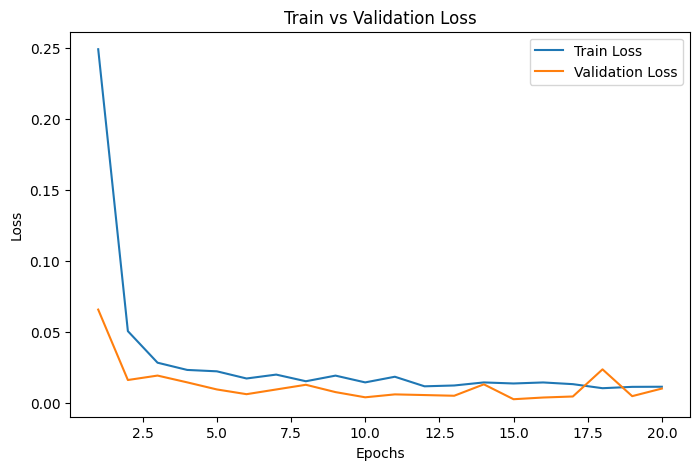

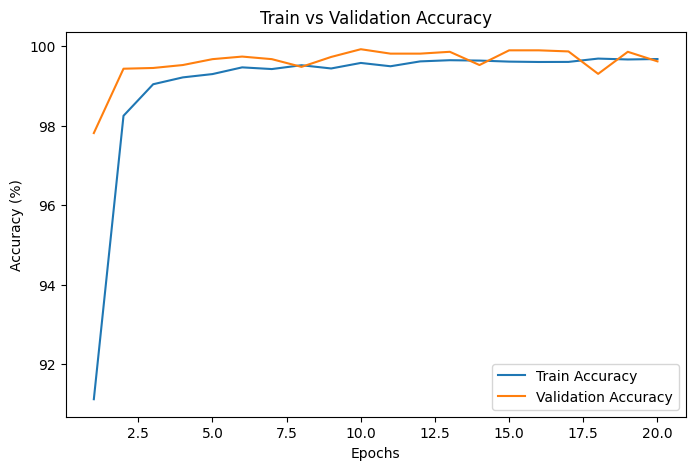

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define Constants
SAMPLE_RATE = 16000  # Ensure consistency
N_MELS = 128
FIXED_LENGTH = 256  # Fixed spectrogram length
BATCH_SIZE = 32  
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Audio Dataset
class AudioDataset(Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path = self.data[idx]
        label = self.labels[idx]

        try:
            # Load audio
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

            if len(y) == 0:
                print(f"Skipping empty file: {file_path}")
                return None

            # Convert to Mel spectrogram
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

            # Resize spectrogram to fixed shape
            if mel_spectrogram.shape[1] < FIXED_LENGTH:
                pad_width = FIXED_LENGTH - mel_spectrogram.shape[1]
                mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')
            elif mel_spectrogram.shape[1] > FIXED_LENGTH:
                mel_spectrogram = mel_spectrogram[:, :FIXED_LENGTH]

            # Convert to PyTorch tensor
            mel_spectrogram = torch.tensor(mel_spectrogram, dtype=torch.float32)
            mel_spectrogram = mel_spectrogram.unsqueeze(0)  # Add channel dimension

            return mel_spectrogram, torch.tensor(label, dtype=torch.long)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            return None

# Custom collate function to handle None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load dataset
train_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/training")
val_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/validation")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Define CNN Model with Dropout
class AudioCNN(nn.Module):
    def __init__(self):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% probability
        self.fc1 = nn.Linear(128 * (N_MELS // 8) * (FIXED_LENGTH // 8), 256)  
        self.fc2 = nn.Linear(256, 2)  

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.dropout(x)  # Apply dropout after convolution layers
        x = x.view(x.size(0), -1)  
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout before the final layer
        x = self.fc2(x)
        return x

# Initialize Model, Loss, Optimizer with L2 Regularization
model = AudioCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 Regularization

# Training with Early Stopping
num_epochs = 20
best_val_loss = float("inf")
patience = 5
counter = 0

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    val_preds, val_labels = [], []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# Final Evaluation Metrics
print("\nFinal Evaluation:")
print(f"Precision: {precision_score(val_labels, val_preds, average='macro'):.4f}")
print(f"Recall: {recall_score(val_labels, val_preds, average='macro'):.4f}")
print(f"F1 Score: {f1_score(val_labels, val_preds, average='macro'):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(val_labels, val_preds))

# Plot Train vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Train vs Validation Loss")
plt.show()

# Plot Train vs Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Train vs Validation Accuracy")
plt.show()



Testing

Testing: 100%|██████████| 145/145 [00:29<00:00,  4.93it/s, loss=4]      



Test Loss: 1.7425
Accuracy: 0.6204
Precision: 1.0000
Recall: 0.2578
F1 Score: 0.4099


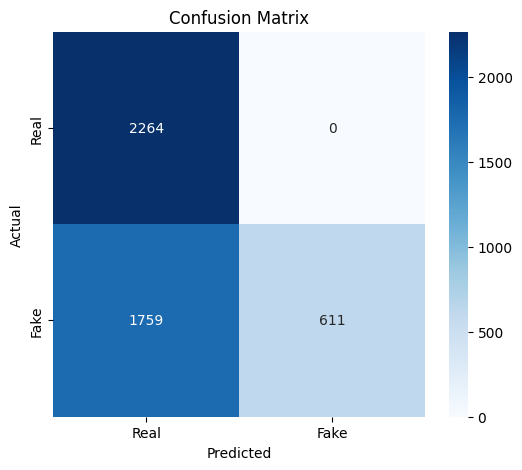

In [59]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader
import librosa
import os

# Define Constants
SAMPLE_RATE = 16000
N_MELS = 128
FIXED_LENGTH = 256
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define Dataset for Testing
class AudioDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path, label = self.data[idx], self.labels[idx]
        try:
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

            if len(y) == 0:
                print(f"Skipping empty file: {file_path}")
                return None

            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            if mel_spec.shape[1] < FIXED_LENGTH:
                pad_width = FIXED_LENGTH - mel_spec.shape[1]
                mel_spec = np.pad(mel_spec, ((0, 0), (0, pad_width)), mode='constant')
            elif mel_spec.shape[1] > FIXED_LENGTH:
                mel_spec = mel_spec[:, :FIXED_LENGTH]

            mel_spec = torch.tensor(mel_spec, dtype=torch.float32).unsqueeze(0)  # Add channel dimension

            return mel_spec, torch.tensor(label, dtype=torch.long)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            return None

# Custom collate function to handle None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load test dataset
test_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/testing")
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Define Model (Same as in Training)
class AudioCNN(nn.Module):
    def __init__(self):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * (N_MELS // 8) * (FIXED_LENGTH // 8), 256)
        self.fc2 = nn.Linear(256, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Load the trained model
model = AudioCNN().to(DEVICE)
model.load_state_dict(torch.load("best_model.pth", map_location=DEVICE))
model.eval()

# Test Loop with Progress Bar
all_preds, all_labels = [], []
test_loss = 0.0
criterion = nn.CrossEntropyLoss()

with torch.no_grad():
    loop = tqdm(test_loader, desc="Testing", leave=True)
    
    for inputs, labels in loop:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        test_loss += loss.item()
        loop.set_postfix(loss=loss.item())

# Compute Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average="binary")
recall = recall_score(all_labels, all_preds, average="binary")
f1 = f1_score(all_labels, all_preds, average="binary")
conf_mat = confusion_matrix(all_labels, all_preds)

# Print Metrics
print(f"\nTest Loss: {test_loss / len(test_loader):.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


CRNN

Epoch 1/20 [Training]:  18%|█▊        | 296/1684 [02:04<09:25,  2.45it/s, loss=0.249]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1837
  warnings.warn(
Epoch 1/20 [Training]:  66%|██████▌   | 1111/1684 [07:48<03:57,  2.42it/s, loss=0.625]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
Epoch 1/20 [Training]:  68%|██████▊   | 1145/1684 [08:02<03:46,  2.38it/s, loss=0.663]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1891
  warnings.warn(
Epoch 1/20 [Validation]:  38%|███▊      | 127/338 [00:26<00:44,  4.73it/s, loss=0.278]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is

Epoch 1/20 - Train Loss: 0.3559, Train Acc: 84.64%, Val Loss: 0.3810, Val Acc: 83.66%


Epoch 2/20 [Validation]: 100%|██████████| 338/338 [01:07<00:00,  5.03it/s, loss=0.432]


Epoch 2/20 - Train Loss: 0.3554, Train Acc: 84.75%, Val Loss: 0.3667, Val Acc: 84.02%


Epoch 3/20 [Validation]: 100%|██████████| 338/338 [01:05<00:00,  5.15it/s, loss=0.352]


Epoch 3/20 - Train Loss: 0.3533, Train Acc: 84.87%, Val Loss: 0.3589, Val Acc: 83.97%


Epoch 4/20 [Validation]: 100%|██████████| 338/338 [01:06<00:00,  5.09it/s, loss=0.533]


Epoch 4/20 - Train Loss: 0.3522, Train Acc: 84.95%, Val Loss: 0.3642, Val Acc: 84.65%


Epoch 5/20 [Validation]: 100%|██████████| 338/338 [01:04<00:00,  5.21it/s, loss=0.418]


Epoch 5/20 - Train Loss: 0.3521, Train Acc: 85.03%, Val Loss: 0.3563, Val Acc: 84.94%


Epoch 6/20 [Validation]: 100%|██████████| 338/338 [01:04<00:00,  5.26it/s, loss=0.543]


Epoch 6/20 - Train Loss: 0.3509, Train Acc: 84.96%, Val Loss: 0.3704, Val Acc: 84.85%


Epoch 7/20 [Validation]: 100%|██████████| 338/338 [01:08<00:00,  4.95it/s, loss=0.464]


Epoch 7/20 - Train Loss: 0.3526, Train Acc: 84.80%, Val Loss: 0.3572, Val Acc: 84.46%


Epoch 8/20 [Validation]: 100%|██████████| 338/338 [01:05<00:00,  5.18it/s, loss=0.493]


Epoch 8/20 - Train Loss: 0.3553, Train Acc: 84.86%, Val Loss: 0.3680, Val Acc: 83.48%


Epoch 9/20 [Validation]: 100%|██████████| 338/338 [01:04<00:00,  5.22it/s, loss=0.351]


Epoch 9/20 - Train Loss: 0.3530, Train Acc: 84.89%, Val Loss: 0.3727, Val Acc: 84.08%


Epoch 10/20 [Validation]: 100%|██████████| 338/338 [01:06<00:00,  5.08it/s, loss=0.372]

Epoch 10/20 - Train Loss: 0.3507, Train Acc: 85.01%, Val Loss: 0.3594, Val Acc: 84.85%
Early stopping triggered.
Precision: 0.8235, Recall: 0.8870, F1-Score: 0.8541


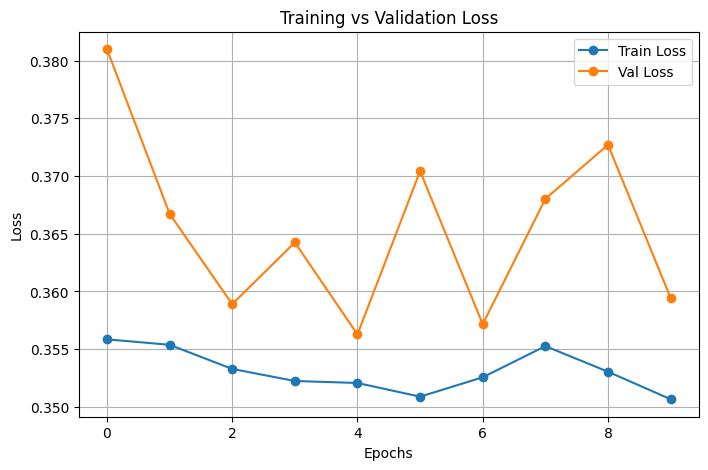

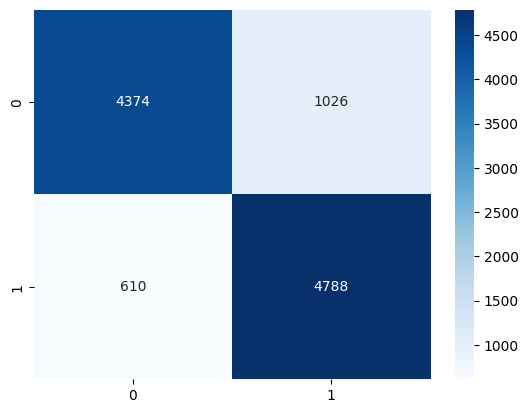

In [ ]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define constants
SAMPLE_RATE = 16000
N_MELS = 128
FIXED_LENGTH = 256
BATCH_SIZE = 32
EPOCHS = 20
PATIENCE = 5  # Early stopping patience

# Custom Dataset
class AudioDataset(Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path, label = self.data[idx], self.labels[idx]
        try:
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            # Ensure the spectrogram has a fixed shape (128, 256)
            mel_spec = np.pad(mel_spec, ((0, 0), (0, max(0, FIXED_LENGTH - mel_spec.shape[1]))), mode="constant")[:, :FIXED_LENGTH]

            # Convert to PyTorch tensor and add a channel dimension
            mel_spec = torch.tensor(mel_spec, dtype=torch.float32).unsqueeze(0)  # Shape: (1, 128, 256)

            return mel_spec, torch.tensor(label, dtype=torch.long)
        except:
            return None

# Custom collate function to skip None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load dataset
train_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/training")
val_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/validation")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# CRNN Model with Dropout & L2 Regularization
class CRNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CRNN, self).__init__()
        
        # Convolutional layers
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),  # (batch, 32, 64, 128)
            nn.Conv2d(32, 64, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),  # (batch, 64, 32, 64)
            nn.Dropout(0.3)
        )

        # LSTM layer
        self.lstm = nn.LSTM(input_size=64 * 64,  # Corrected: 4096
                            hidden_size=128, num_layers=2, 
                            batch_first=True, bidirectional=True)

        # Fully connected layer
        self.fc = nn.Linear(128 * 2, num_classes)

    def forward(self, x):
        x = self.conv(x)  # (batch, 64, 32, 64)
        x = x.permute(0, 2, 3, 1)  # (batch, time_steps=32, width=64, channels=64)
        x = x.reshape(x.shape[0], x.shape[1], -1)  # (batch, time_steps=32, features=64*64=4096)
        x, _ = self.lstm(x)  # Now correctly passes into LSTM
        x = self.fc(x[:, -1, :])  # Take last time-step output
        return x

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CRNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 Regularization
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Training with Early Stopping
best_val_loss = float("inf")
patience_counter = 0
train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Training]")  # Progress bar
    for inputs, labels in train_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct += (outputs.argmax(dim=1) == labels).sum().item()
        total += labels.size(0)

        train_bar.set_postfix(loss=loss.item())

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    all_preds, all_labels = [], []

    val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Validation]")  # Progress bar
    with torch.no_grad():
        for inputs, labels in val_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += (outputs.argmax(dim=1) == labels).sum().item()
            val_total += labels.size(0)

            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            val_bar.set_postfix(loss=loss.item())

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

    scheduler.step(val_loss)

# Performance Metrics
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Val Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.grid()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.show()


In [47]:
torch.save(model.state_dict(), "crnn_best.pth")


Testing

Testing Model: 100%|██████████| 145/145 [00:26<00:00,  5.57it/s]

Accuracy: 0.3770
Precision: 0.4302
Recall: 0.6717
F1-Score: 0.5245


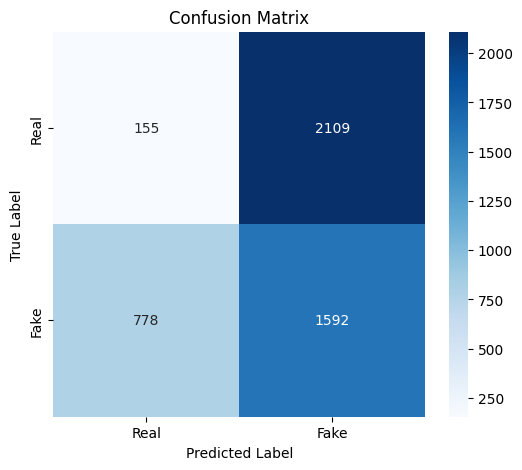

In [67]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load best model
model.load_state_dict(torch.load("best_model.pth"), strict=False)
model.to(device)
model.eval()

# Initialize lists to store predictions and true labels
all_preds, all_labels = [], []

# Test DataLoader
test_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/testing")
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Test Progress Bar
test_bar = tqdm(test_loader, desc="Testing Model")

with torch.no_grad():
    for inputs, labels in test_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute Performance Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')

# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ResNet50

Epoch 1/10 [Training]:  40%|███▉      | 673/1684 [31:30<47:43,  2.83s/it, loss=0.00448]   /opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1891
  warnings.warn(
Epoch 1/10 [Training]:  51%|█████▏    | 866/1684 [40:32<39:47,  2.92s/it, loss=0.0516]  /opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
Epoch 1/10 [Training]:  60%|█████▉    | 1003/1684 [1:06:20<31:47,  2.80s/it, loss=0.00158]    /opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1837
  warnings.warn(
Epoch 1/10 [Validation]:  38%|███▊      | 127/338 [03:33<05:52,  1.67s/it, loss=0.000105]/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarn

Epoch 1/10 - Train Loss: 0.0337, Train Acc: 98.79%, Val Loss: 0.0030, Val Acc: 99.93%
Model saved successfully as resnet50_best.pth


Epoch 2/10 [Validation]: 100%|██████████| 338/338 [09:59<00:00,  1.77s/it, loss=0.0105]  


Epoch 2/10 - Train Loss: 0.0100, Train Acc: 99.66%, Val Loss: 0.0087, Val Acc: 99.68%


Epoch 3/10 [Validation]: 100%|██████████| 338/338 [10:07<00:00,  1.80s/it, loss=0.000128]


Epoch 3/10 - Train Loss: 0.0063, Train Acc: 99.79%, Val Loss: 0.0022, Val Acc: 99.94%
Model saved successfully as resnet50_best.pth


Epoch 4/10 [Validation]: 100%|██████████| 338/338 [09:28<00:00,  1.68s/it, loss=0.00201] 


Epoch 4/10 - Train Loss: 0.0076, Train Acc: 99.77%, Val Loss: 0.0378, Val Acc: 98.85%


Epoch 5/10 [Validation]: 100%|██████████| 338/338 [1:38:11<00:00, 17.43s/it, loss=0.000566]    


Epoch 5/10 - Train Loss: 0.0050, Train Acc: 99.85%, Val Loss: 0.0030, Val Acc: 99.91%


Epoch 6/10 [Validation]: 100%|██████████| 338/338 [10:14<00:00,  1.82s/it, loss=0.000384]


Epoch 6/10 - Train Loss: 0.0061, Train Acc: 99.81%, Val Loss: 0.0026, Val Acc: 99.93%


Epoch 7/10 [Validation]: 100%|██████████| 338/338 [49:29<00:00,  8.78s/it, loss=0.00405]    


Epoch 7/10 - Train Loss: 0.0046, Train Acc: 99.86%, Val Loss: 0.0018, Val Acc: 99.94%
Model saved successfully as resnet50_best.pth


Epoch 8/10 [Validation]: 100%|██████████| 338/338 [10:06<00:00,  1.80s/it, loss=0.00861] 


Epoch 8/10 - Train Loss: 0.0037, Train Acc: 99.90%, Val Loss: 0.0062, Val Acc: 99.83%


Epoch 9/10 [Validation]: 100%|██████████| 338/338 [09:50<00:00,  1.75s/it, loss=0.00257] 


Epoch 9/10 - Train Loss: 0.0040, Train Acc: 99.89%, Val Loss: 0.0016, Val Acc: 99.97%
Model saved successfully as resnet50_best.pth


Epoch 10/10 [Validation]: 100%|██████████| 338/338 [09:30<00:00,  1.69s/it, loss=0.0115]  

Epoch 10/10 - Train Loss: 0.0030, Train Acc: 99.93%, Val Loss: 0.0044, Val Acc: 99.86%

=== Performance Metrics ===
Precision: 0.9986
Recall:    0.9986
F1 Score:  0.9986


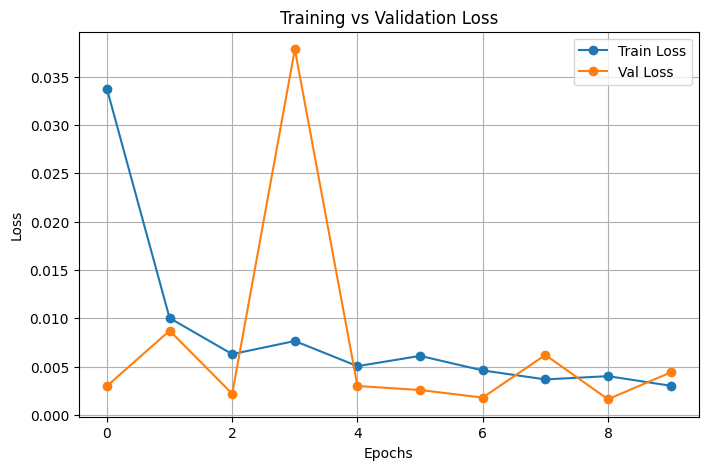

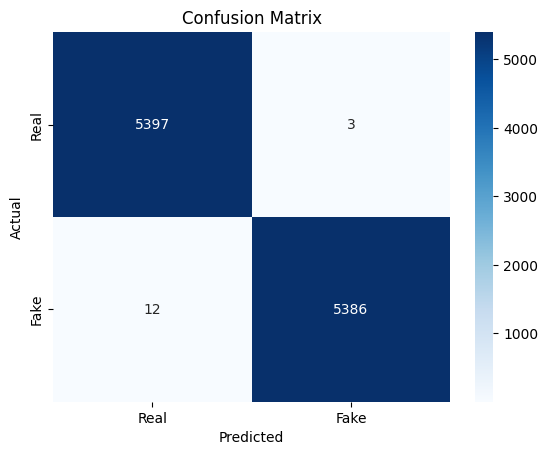

In [50]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define constants
SAMPLE_RATE = 16000
N_MELS = 128
FIXED_LENGTH = 256
BATCH_SIZE = 32
EPOCHS = 10
PATIENCE = 5  # Early stopping patience

# Custom Dataset
class AudioDataset(Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path, label = self.data[idx], self.labels[idx]
        try:
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            # Ensure the spectrogram has a fixed shape (128, 256)
            mel_spec = np.pad(mel_spec, ((0, 0), (0, max(0, FIXED_LENGTH - mel_spec.shape[1]))), mode="constant")[:, :FIXED_LENGTH]

            # Normalize and convert to tensor
            mel_spec = torch.tensor(mel_spec, dtype=torch.float32).unsqueeze(0)  # Shape: (1, 128, 256)
            mel_spec = torch.cat([mel_spec] * 3, dim=0)  # Convert to 3 channels for ResNet

            return mel_spec, torch.tensor(label, dtype=torch.long)
        except:
            return None

# Custom collate function to skip None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load dataset
train_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/training")
val_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/validation")

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Load Pretrained ResNet50 and Modify
class PretrainedResNet(nn.Module):
    def __init__(self, num_classes=2):
        super(PretrainedResNet, self).__init__()
        self.model = models.resnet50(pretrained=True)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=2, padding=3, bias=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PretrainedResNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Training with Early Stopping
best_val_loss = float("inf")
patience_counter = 0
train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Training]")  # Progress bar
    for inputs, labels in train_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct += (outputs.argmax(dim=1) == labels).sum().item()
        total += labels.size(0)

        train_bar.set_postfix(loss=loss.item())

    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    all_preds, all_labels = [], []

    val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Validation]")  # Progress bar
    with torch.no_grad():
        for inputs, labels in val_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_correct += (outputs.argmax(dim=1) == labels).sum().item()
            val_total += labels.size(0)

            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            val_bar.set_postfix(loss=loss.item())

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0

        # Save the best model
        torch.save(model.state_dict(), "resnet50_best.pth")
        print("Model saved successfully as resnet50_best.pth")

    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

    scheduler.step(val_loss)

# Compute Precision, Recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")

# Print Metrics
print("\n=== Performance Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Val Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.grid()
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Testing

/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Testing Model: 100%|██████████| 145/145 [04:03<00:00,  1.68s/it]


=== Performance Metrics ===
Accuracy:  0.5227
Precision: 1.0000
Recall:    0.0667
F1 Score:  0.1250


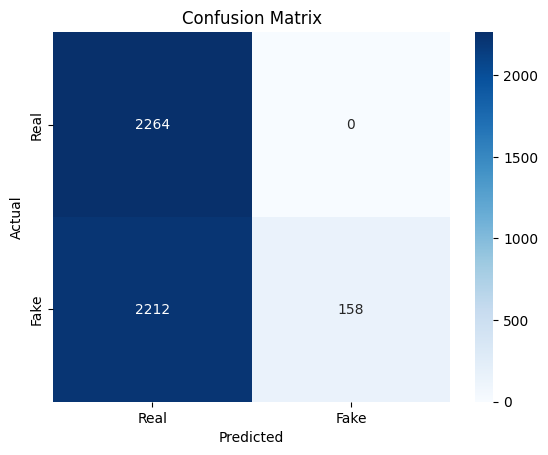

In [68]:
import os
import torch
import librosa
import numpy as np
import torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from torch.utils.data import Dataset, DataLoader

# Define constants
SAMPLE_RATE = 16000
N_MELS = 128
FIXED_LENGTH = 256
BATCH_SIZE = 32

# Custom Dataset for Testing
class AudioDataset(Dataset):
    def __init__(self, root_dir):
        self.data = []
        self.labels = []
        self.root_dir = root_dir
        self.classes = ["real", "fake"]

        for label, class_name in enumerate(self.classes):
            class_path = os.path.join(root_dir, class_name)
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                self.data.append(file_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        file_path, label = self.data[idx], self.labels[idx]
        try:
            y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
            mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
            mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

            # Ensure the spectrogram has a fixed shape (128, 256)
            mel_spec = np.pad(mel_spec, ((0, 0), (0, max(0, FIXED_LENGTH - mel_spec.shape[1]))), mode="constant")[:, :FIXED_LENGTH]

            # Normalize and convert to tensor
            mel_spec = torch.tensor(mel_spec, dtype=torch.float32).unsqueeze(0)  # Shape: (1, 128, 256)
            mel_spec = torch.cat([mel_spec] * 3, dim=0)  # Convert to 3 channels for ResNet

            return mel_spec, torch.tensor(label, dtype=torch.long)
        except:
            return None

# Custom collate function to skip None samples
def collate_fn(batch):
    batch = [b for b in batch if b is not None]
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.dataloader.default_collate(batch)

# Load test dataset
test_dataset = AudioDataset("The Fake-or-Real Dataset /for-norm/for-norm/testing")
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Load Pretrained ResNet50 Model
class PretrainedResNet(nn.Module):
    def __init__(self, num_classes=2):
        super(PretrainedResNet, self).__init__()
        self.model = models.resnet50(pretrained=False)  # pretrained=False since we are loading saved weights
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=2, padding=3, bias=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Load trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PretrainedResNet().to(device)
model.load_state_dict(torch.load("resnet50_best.pth"))
model.eval()

# Testing Loop
test_preds, test_labels = [], []
test_bar = tqdm(test_loader, desc="Testing Model")

with torch.no_grad():
    for inputs, labels in test_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Compute Metrics
accuracy = accuracy_score(test_labels, test_preds)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, test_preds, average="binary")

print("\n=== Performance Metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
conf_mat = confusion_matrix(test_labels, test_preds)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
